In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os

In [3]:
import pandas as pd
df = pd.read_csv('archive/clocks.csv')
df.head()

,class index,filepaths,labels,data set
0,0,train/1-00/0.jpg,1_00,train
1,0,train/1-00/1.jpg,1_00,train
2,0,train/1-00/11.jpg,1_00,train
3,0,train/1-00/12.jpg,1_00,train
4,0,train/1-00/13.jpg,1_00,train


In [4]:
train_df = df[df['data set'] == 'train' ]
train_df.head()

,class index,filepaths,labels,data set
0,0,train/1-00/0.jpg,1_00,train
1,0,train/1-00/1.jpg,1_00,train
2,0,train/1-00/11.jpg,1_00,train
3,0,train/1-00/12.jpg,1_00,train
4,0,train/1-00/13.jpg,1_00,train


In [5]:
test_df = df[df['data set'] != 'train' ]
test_df.reset_index(inplace = True)
test_df.drop(columns = ['index'],inplace = True)
test_df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9588\1776149690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(columns = ['index'],inplace = True)


,class index,filepaths,labels,data set
0,0,test/1-00/10.jpg,1_00,test
1,0,test/1-00/31.jpg,1_00,test
2,0,test/1-00/38.jpg,1_00,test
3,0,test/1-00/50.jpg,1_00,test
4,0,test/1-00/53.jpg,1_00,test


In [10]:
print(train_df.shape)
print(test_df.shape)

(11520, 4)
(2880, 4)


In [7]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
dir = 'D:\\Yasmin\\Clocks\\archive\\train'
dirs = os.listdir(dir)
imshow_dirs = []
for i in dirs : 
    step = os.listdir(dir+ '\\'+ i)
    imshow_dirs.append(dir+ '\\' + i + '\\' + step[1])
print(len(imshow_dirs))  

144


In [8]:
imshow_dirs[0]

'D:\\Yasmin\\Clocks\\archive\\train\\1-00\\1.jpg'

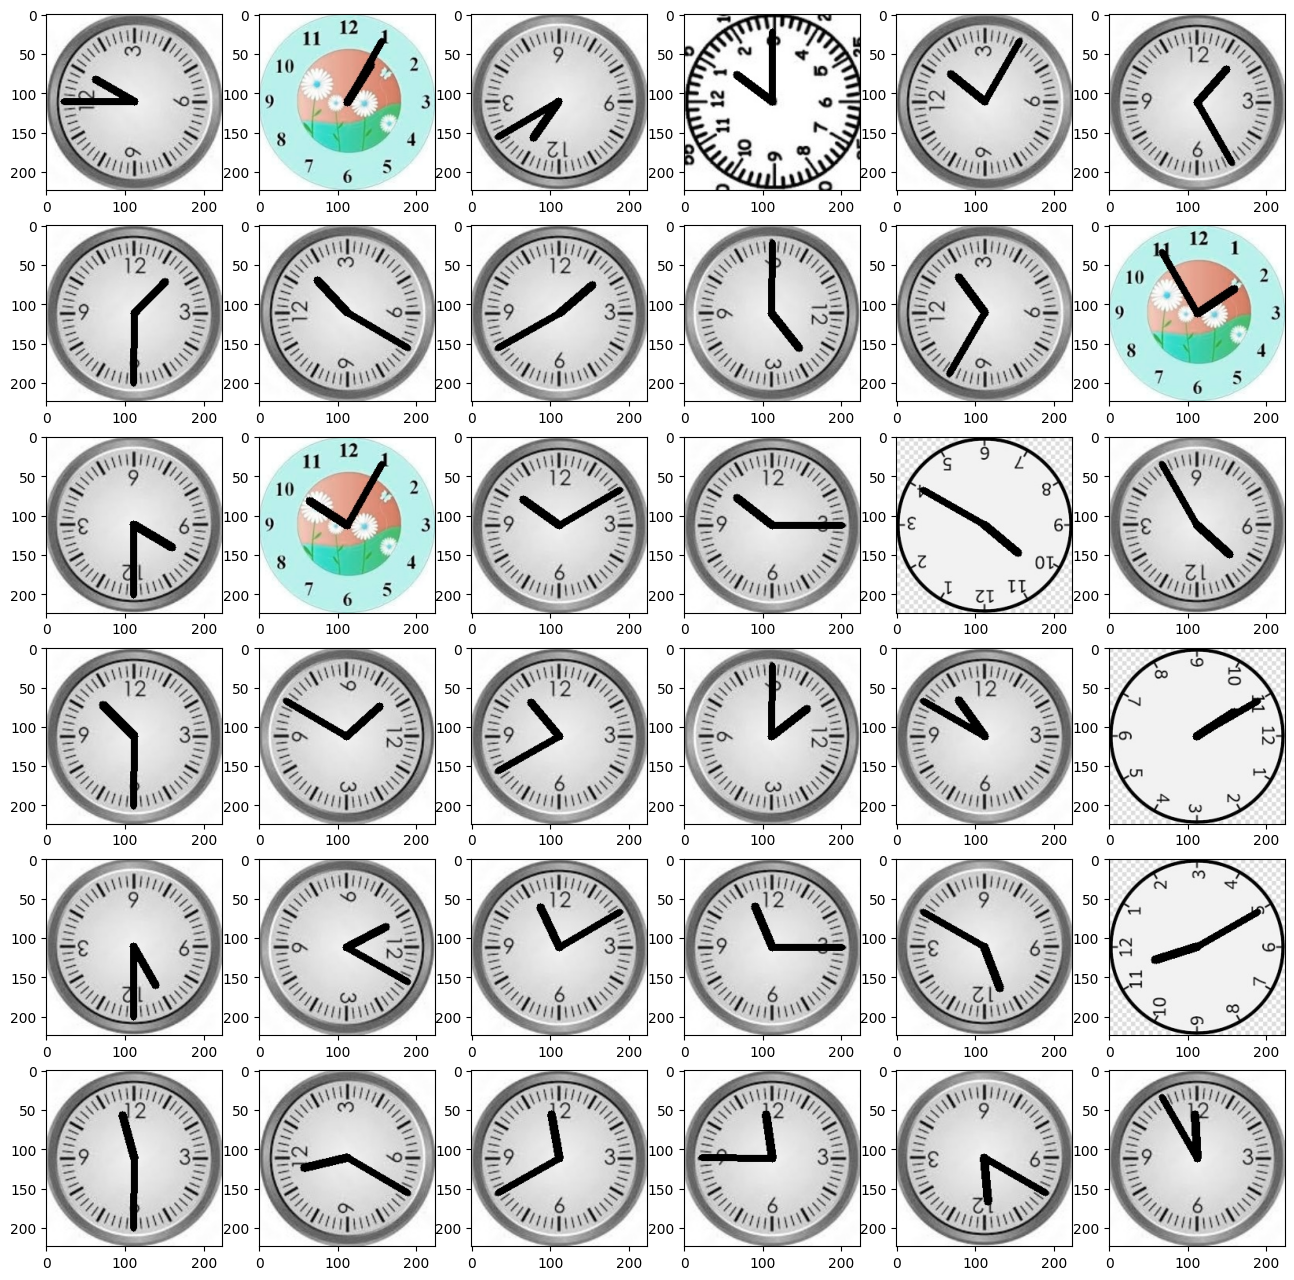

In [9]:
fig, ax = plt.subplots(6,6,figsize=(16,16))
for n in range(6):
    for m in range(6):
        path =imshow_dirs[m + 6*n]
        image = cv2.imread(str(path))
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generation = ImageDataGenerator(rescale=1.0/255)

In [13]:
train_generation = data_generation.flow_from_directory(
                                        "D:\\Yasmin\\Clocks\\archive\\train",
                                        target_size=(224,224),
                                        batch_size=10,
                                        class_mode='categorical',
                                       color_mode = 'grayscale' )
test_generation = data_generation.flow_from_directory(
                                        "D:\\Yasmin\\Clocks\\archive\\test",
                                        target_size=(224,224),
                                        batch_size=10,
                                        class_mode='categorical',
                                        color_mode = 'grayscale')
val_generation = data_generation.flow_from_directory(
                                        "D:\\Yasmin\\Clocks\\archive\\valid",
                                        target_size=(224,224),
                                        batch_size=10,
                                        class_mode='categorical',
                                        color_mode = 'grayscale')

Found 11520 images belonging to 144 classes.
Found 1440 images belonging to 144 classes.
Found 1440 images belonging to 144 classes.


In [17]:
Model_2  = tf.keras.models.Sequential()
Model_2.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(244,224,1),activation='relu',kernel_initializer='he_uniform',))
Model_2.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform',))
Model_2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
Model_2.add(tf.keras.layers.BatchNormalization())
Model_2.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(2,2),activation='relu',kernel_initializer='he_uniform',))
Model_2.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(2,2),activation='relu',kernel_initializer='he_uniform',))
Model_2.add(tf.keras.layers.BatchNormalization())
Model_2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
Model_2.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(2,2),activation='relu',kernel_initializer='he_uniform',))
Model_2.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(2,2),activation='relu',kernel_initializer='he_uniform',))
Model_2.add(tf.keras.layers.BatchNormalization())
Model_2.add(tf.keras.layers.Dropout((0.3)))
Model_2.add(tf.keras.layers.Flatten())
Model_2.add(tf.keras.layers.Dense(1024,activation='relu'))
Model_2.add(tf.keras.layers.Dropout((0.5)))
Model_2.add(tf.keras.layers.Dense(144,activation='softmax'))

In [18]:
Model_2.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [2]:
Model_2.fit(train_generation,validation_data=test_generation,epochs=120)

NameError: name 'Model_2' is not defined

In [36]:
import tkinter as tk
from tkinter import filedialog, Label
from tensorflow.keras.preprocessing import image
import numpy as np

# Helper function to convert label to decimal time
def convert_to_decimal_time(label):
    hour, minute = label.split('-')
    hour = int(hour)
    minute = int(minute)
    decimal_time = hour + minute / 60.0  # Convert minute to decimal
    return decimal_time

# Function to predict time from a new image and output decimal time
def predict_decimal_time(img_path, model, train_gen, label_widget):
    # Step 1: Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224), color_mode='grayscale')
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Step 2: Predict the class (label) using the trained model
    predictions = model.predict(img_array)
    predicted_class_idx = np.argmax(predictions, axis=1)[0]

    # Step 3: Map predicted class index to the time label
    label_map = train_gen.class_indices  # This is the mapping of labels to indices
    label_map = dict((v, k) for k, v in label_map.items())  # Invert to get label from index
    predicted_label = label_map[predicted_class_idx]  # Get the predicted time label (e.g., "3-30")

    # Step 4: Convert the time label to decimal format
    decimal_time = convert_to_decimal_time(predicted_label)

    # Step 5: Update the label with predicted results
    label_widget.config(text=f'Predicted Time (Label): {predicted_label}\nDecimal Time: {decimal_time:.2f}')

# Function to open file dialog and get the file path
def open_file_dialog():
    file_path = filedialog.askopenfilename()
    if file_path:
        predict_decimal_time(file_path, model, train_gen, result_label)

# GUI setup using tkinter
root = tk.Tk()
root.title("Clock Time Prediction")

# Label to show the result
result_label = Label(root, text="Predicted Time will appear here", font=("Arial", 12), wraplength=400)
result_label.pack(pady=20)

# Button to load an image
load_image_btn = tk.Button(root, text="Select Image", command=open_file_dialog, font=("Arial", 12))
load_image_btn.pack(pady=10)

# Run the GUI loop
root.geometry("500x300")
root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted Time (Label): 10-10
